# Find the distance between zip codes and fire stations 

In [41]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gpt
import matplotlib.pyplot as plt
import dataloader

## Plot fire station locations

In [42]:
with open('./data/SanDiego_zipcode.txt', 'r') as f:
    zips = f.readline().strip().replace(',', '').split()
county = gpd.read_file('san_diego_zip_codes.geojson')
san_diego = county[county['zip'].isin(zips)]
san_diego = san_diego.reset_index()
san_diego.rename(columns = {'zip':'address_zip'}, inplace = True)

In [43]:
fire_df = pd.read_csv('./data/fire_station_position.csv')
# the information of the location of fire stations
gdf = gpd.GeoDataFrame(fire_df, geometry=gpd.points_from_xy(fire_df.longitude, fire_df.latitude))

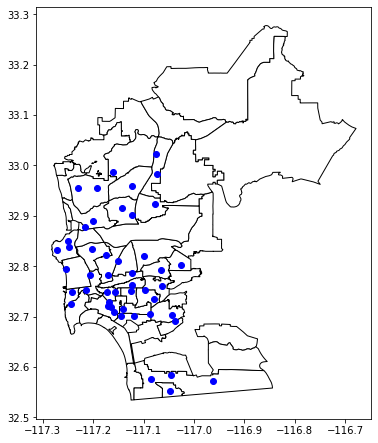

In [44]:
'''
Plot the san diego boundary
'''

# ax creates the base map 
ax = san_diego.plot(
    color='white', edgecolor='black', figsize=(6,12))

# call information from gdf overlap on ax
gdf.plot(ax = ax, color = 'blue')
plt.savefig('fire_station_map.pdf')

#fire_station = san_diego.merge(fire_df, on = 'address_zip', how = 'inner')


## Combine incident heatmap and fire stations

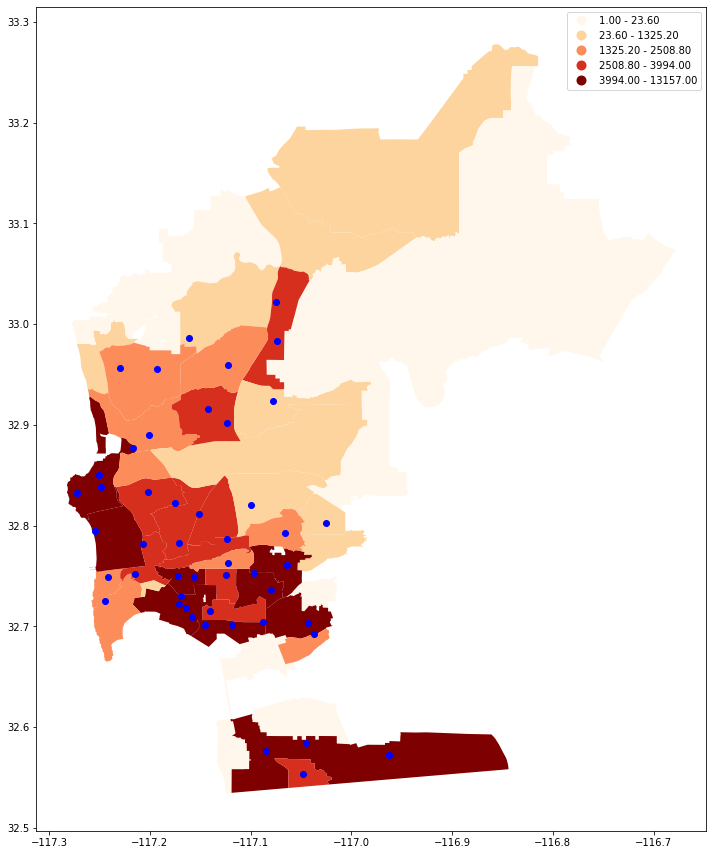

In [45]:
_08 = dataloader.load([2008])
_08['address_zip'] = _08['address_zip'].fillna(0.0).astype(int).astype(str)
_08_incidents = pd.pivot_table(_08, values='incident_number', index=['address_zip'], columns=[], aggfunc=np.ma.count, fill_value=0)
_08_san_diego = san_diego.merge(_08_incidents, on = 'address_zip', how = 'inner')
_08_san_diego['incident_number'] = _08_san_diego['incident_number'].fillna(0.0).astype(int)

ax = _08_san_diego.plot(column = 'incident_number', scheme = 'quantiles', legend=True, cmap = 'OrRd', figsize=(12,20))
gdf.plot(ax = ax, color = 'blue')

plt.savefig('fire_station_heatmap.pdf')
plt.show()